**Initialisation of the program**

In [3]:
# importing of modules for CIFAR-100 CNN
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [4]:
#training constants
BATCH_SIZE = 32
N_EPOCH = 100
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [5]:

IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-100 data loading and processing__


In [6]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-100 images**

Sample input image: [[[0.98039216 0.98039216 0.972549  ]
  [0.972549   0.9764706  0.9529412 ]
  [0.96862745 0.972549   0.9372549 ]
  ...
  [0.98039216 0.98039216 0.9647059 ]
  [0.98039216 0.98039216 0.9647059 ]
  [0.9764706  0.98039216 0.9647059 ]]

 [[0.98039216 0.9843137  0.9607843 ]
  [0.972549   0.9764706  0.93333334]
  [0.96862745 0.96862745 0.91764706]
  ...
  [0.9843137  0.9843137  0.9490196 ]
  [0.9843137  0.9882353  0.9529412 ]
  [0.98039216 0.9843137  0.9529412 ]]

 [[0.9843137  0.9843137  0.95686275]
  [0.98039216 0.972549   0.92941177]
  [0.98039216 0.9607843  0.9137255 ]
  ...
  [0.98039216 0.9764706  0.93333334]
  [0.98039216 0.9764706  0.9411765 ]
  [0.98039216 0.9764706  0.9490196 ]]

 ...

 [[0.8666667  0.8352941  0.7490196 ]
  [0.8666667  0.80784315 0.6901961 ]
  [0.88235295 0.8117647  0.70980394]
  ...
  [0.78039217 0.6901961  0.5254902 ]
  [0.8117647  0.75686276 0.64705884]
  [0.9137255  0.8980392  0.8862745 ]]

 [[0.88235295 0.8745098  0.8       ]
  [0.8901961  0.8

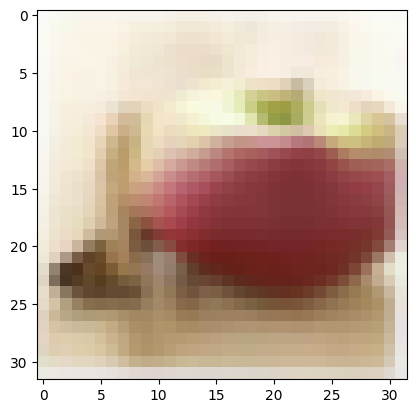

Sample input image: [[[0.4862745  0.7607843  0.8666667 ]
  [0.5137255  0.7921569  0.89411765]
  [0.5294118  0.80784315 0.89411765]
  ...
  [0.58431375 0.88235295 0.9254902 ]
  [0.56078434 0.8627451  0.91764706]
  [0.53333336 0.8352941  0.9019608 ]]

 [[0.4745098  0.7607843  0.8627451 ]
  [0.5019608  0.7882353  0.88235295]
  [0.5254902  0.80784315 0.89411765]
  ...
  [0.5921569  0.8784314  0.91764706]
  [0.57254905 0.87058824 0.91764706]
  [0.5568628  0.8509804  0.9098039 ]]

 [[0.47843137 0.77254903 0.8745098 ]
  [0.5058824  0.8        0.89411765]
  [0.53333336 0.8156863  0.8980392 ]
  ...
  [0.6117647  0.89411765 0.9254902 ]
  [0.6        0.8862745  0.92941177]
  [0.5803922  0.8666667  0.92156863]]

 ...

 [[0.5058824  0.16470589 0.23137255]
  [0.5764706  0.06666667 0.14901961]
  [0.5921569  0.0627451  0.11764706]
  ...
  [0.91764706 0.90588236 0.88235295]
  [0.93333334 0.9411765  0.9137255 ]
  [0.8784314  0.77254903 0.7882353 ]]

 [[0.5882353  0.08235294 0.15686275]
  [0.59607846 0.0

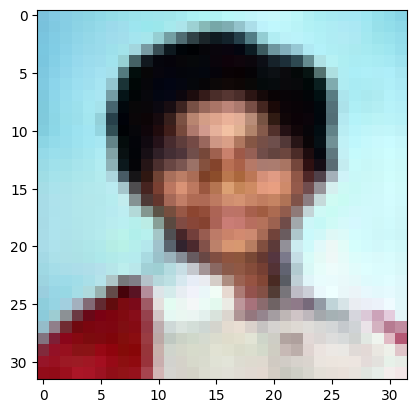

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show()





**CNN definition**

In [8]:


def build_densenet_sequential(weight_decay=5e-5, dropout_rate=0.5, growth_rate=32):
    model = Sequential([
        # Initial conv layer
        Conv2D(2 * growth_rate, (3, 3), padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay), input_shape=(32, 32, 3)),
        BatchNormalization(),
        Activation('relu'),

        # Block 1
        Conv2D(growth_rate, (3, 3), padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),


        Conv2D(growth_rate, (3, 3), padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        # Block 2
        Conv2D(growth_rate * 2, (3, 3), strides=2, padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),

        Conv2D(growth_rate, (3, 3), padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        # Block 3
        Conv2D(growth_rate * 2, (3, 3), strides=2, padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),

        Conv2D(growth_rate, (3, 3), padding='same', use_bias=False,
               kernel_regularizer=l2(weight_decay)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(dropout_rate),

        # Classification head
        GlobalAveragePooling2D(),
        Dense(100, activation='softmax', kernel_regularizer=l2(weight_decay))
    ])

    return model


**Model compilation**

In [9]:
model = build_densenet_sequential()

# compile the model
OPTIM1 = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 64)            │             2

 Total params: 107,684 (420.64 KB)

 Trainable params: 107,044 (418.14 KB)

 Non-trainable params: 640 (2.50 KB)

**Training CNN**




In [10]:


history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.0440 - loss: 4.3668 - val_accuracy: 0.0711 - val_loss: 4.0706
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.1029 - loss: 3.8421 - val_accuracy: 0.1203 - val_loss: 3.6864
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1438 - loss: 3.5638 - val_accuracy: 0.1530 - val_loss: 3.5521
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1956 - loss: 3.3051 - val_accuracy: 0.1816 - val_loss: 3.3499
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2195 - loss: 3.1349 - val_accuracy: 0.2006 - val_loss: 3.2761
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2532 - loss: 3.0188 - val_accuracy: 0.2500 - val_loss: 3.0240
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2727 - loss: 2.8932 - val_accuracy: 0.2860 - val_loss: 2.8442
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2900 - los

**Saving of the model and of the trained weights**




In [ ]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.weights.h5', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10.weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


**Analysis of the results**


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4286 - loss: 2.3536

Test score/loss: 2.363497495651245
Test accuracy: 0.4244999885559082
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


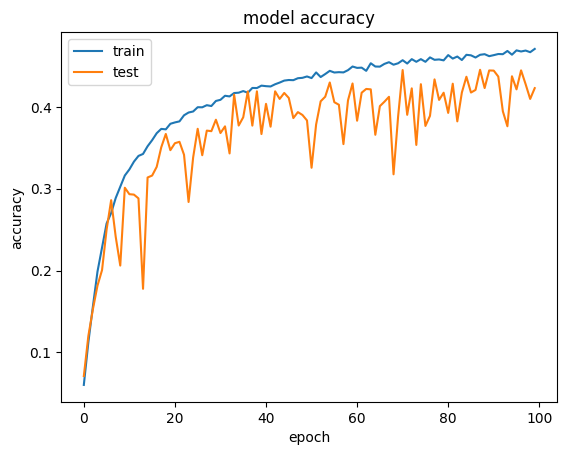

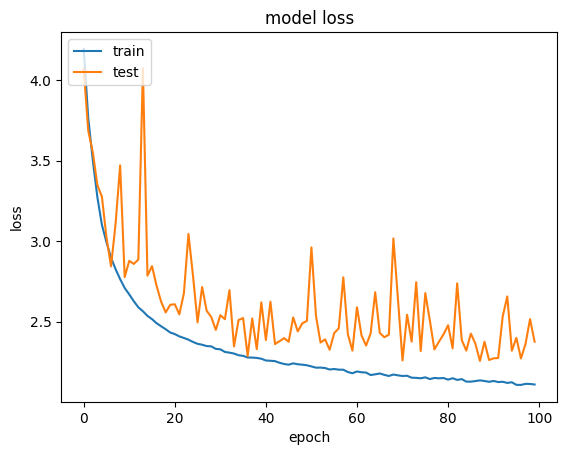

In [11]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
